In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# Data cleaning

## Properties data

In [2]:
properties = pd.read_csv('properties.csv', index_col=0)
properties.head()

,﻿id,building,date_sale,type,property#,area,price,status,customerid
0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014


In [3]:
properties.dtypes 

id             int64
building        int64
date_sale      object
type           object
property#       int64
area          float64
price          object
status         object
customerid     object
dtype: object

In [4]:
properties.describe(include="all")

,﻿id,building,date_sale,type,property#,area,price,status,customerid
count,267.000000,267.000000,267,267,267.000000,267.000000,267,267,195
unique,NaN,NaN,44,2,NaN,NaN,266,2,162
top,NaN,NaN,#NUM!,Apartment,NaN,NaN,"$460,001.26",Sold,C0174
freq,NaN,NaN,72,259,NaN,NaN,2,195,9
mean,2975.142322,2.947566,NaN,NaN,27.580524,936.221311,NaN,NaN,NaN
std,1392.197474,1.391794,NaN,NaN,15.361437,284.894858,NaN,NaN,NaN
min,1002.000000,1.000000,NaN,NaN,1.000000,410.710000,NaN,NaN,NaN
25%,2015.500000,2.000000,NaN,NaN,14.500000,756.210000,NaN,NaN,NaN
50%,3024.000000,3.000000,NaN,NaN,28.000000,798.280000,NaN,NaN,NaN
75%,4031.500000,4.000000,NaN,NaN,40.000000,1121.950000,NaN,NaN,NaN


We first change the column names according to the snake case convention.

In [5]:
# Rename the columns 'customerid' to 'customer_id', and 'status' to 'sold'.
properties.rename(columns={'customerid':'customer_id', 'status':'sold'}, inplace=True)
properties.head()

,﻿id,building,date_sale,type,property#,area,price,sold,customer_id
0,1030,1,11/1/2005,Apartment,30,743.09,"$246,172.68",Sold,C0028
1,1029,1,10/1/2005,Apartment,29,756.21,"$246,331.90",Sold,C0027
2,2002,2,7/1/2007,Apartment,2,587.28,"$209,280.91",Sold,C0112
3,2031,2,12/1/2007,Apartment,31,1604.75,"$452,667.01",Sold,C0160
4,1049,1,11/1/2004,Apartment,49,1375.45,"$467,083.31",Sold,C0014


Things to preprocess:
1. Convert data type of sale date column to the pandas date type
2. Change values of the type column to lowercase
3. Preprocess price column
4. Encode values of the sold column using 0 and 1
5. Add sale year column
6. Finalise data types
7. Handle missing values
8. Final check

1. Convert data type of sale date column to the pandas date type.

In [6]:
properties['date_sale'] = pd.to_datetime(properties['date_sale'], format='%m/%d/%Y', errors='coerce')

2. Change values of the type column to lowercase.

In [7]:
properties["type"].unique()

array(['Apartment', 'Office'], dtype=object)

In [8]:
properties["type"] = properties["type"].str.lower()

3. Preprocess price column

In [9]:
# Remove dollar sign and commas then convert it into a float. 
properties["price"] = properties["price"].apply(lambda x: float(x.strip("$").replace(",", "")))

4. Encode values of the sold column using 0 and 1.

In [10]:
properties["sold"].unique()

array([' Sold ', '-'], dtype=object)

In [11]:
properties['sold'] = properties['sold'].map({" Sold ": 1, "-": 0})
properties["sold"].unique()

array([1, 0])

5. Add sale year column

In [12]:
properties['year_sale'] = properties['date_sale'].apply(lambda x: x.year)
properties['year_sale']

0      2005.0
1      2005.0
2      2007.0
3      2007.0
4      2004.0
        ...  
262       NaN
263       NaN
264       NaN
265       NaN
266       NaN
Name: year_sale, Length: 267, dtype: float64

In [13]:
properties['year_sale'] = properties['year_sale'].fillna(0).astype(int)
properties['year_sale'] = properties['year_sale'].replace({0: np.nan})
properties["year_sale"]

0      2005.0
1      2005.0
2      2007.0
3      2007.0
4      2004.0
        ...  
262       NaN
263       NaN
264       NaN
265       NaN
266       NaN
Name: year_sale, Length: 267, dtype: float64

6. Finalise data types

In [14]:
properties.dtypes

id                     int64
building                int64
date_sale      datetime64[ns]
type                   object
property#               int64
area                  float64
price                 float64
sold                    int64
customer_id            object
year_sale             float64
dtype: object

Even though the "id" column contains numerical values, we will treat it as a categorical variable since mathemtical opeartions on this column are of no interest to us. Thus we will change its type to a string. 

In [15]:
# # The following code will result in an error. This is due to how the "id" column name is encoded. 
# properties['id'] = properties['id'].astype(str)

In [16]:
properties.columns.values

array(['\ufeffid', 'building', 'date_sale', 'type', 'property#', 'area',
       'price', 'sold', 'customer_id', 'year_sale'], dtype=object)

In [17]:
properties.rename(columns={"\ufeffid": "id"}, inplace=True)

In [18]:
properties['id'] = properties['id'].astype(str)

Similarly, we also convert the "building" and "property#" columns to a string data type.

In [19]:
properties['building'] = properties['building'].astype(str)
properties['property#'] = properties['property#'].astype(str)

In [20]:
properties.dtypes

id                     object
building               object
date_sale      datetime64[ns]
type                   object
property#              object
area                  float64
price                 float64
sold                    int64
customer_id            object
year_sale             float64
dtype: object

7. Handle missing values. 

In [21]:
properties.isna().sum()

id              0
building        0
date_sale      72
type            0
property#       0
area            0
price           0
sold            0
customer_id    72
year_sale      72
dtype: int64

In [22]:
properties[pd.isnull(properties['date_sale'])]

,id,building,date_sale,type,property#,area,price,sold,customer_id,year_sale
178,5052,5,NaT,apartment,52,1769.48,532877.38,0,NaN,NaN
196,1002,1,NaT,apartment,2,1238.58,400865.92,0,NaN,NaN
197,1003,1,NaT,office,3,713.71,217787.71,0,NaN,NaN
198,1008,1,NaT,apartment,8,763.21,219630.90,0,NaN,NaN
199,1019,1,NaT,apartment,19,798.50,244624.87,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
262,5044,5,NaT,apartment,44,1238.58,322610.74,0,NaN,NaN
263,5047,5,NaT,apartment,47,794.52,279191.26,0,NaN,NaN
264,5048,5,NaT,apartment,48,1013.27,287996.53,0,NaN,NaN
265,5050,5,NaT,apartment,50,1074.71,365868.78,0,NaN,NaN


In [23]:
properties[pd.isnull(properties['date_sale'])]["sold"].sum()

np.int64(0)

The above table and output indicates that all the missing values for "date_sale" and "customer_id" are for thos properties that have not been sold yet. We will leave these missing values as they are. 

8. Final check

In [24]:
properties.head()

,id,building,date_sale,type,property#,area,price,sold,customer_id,year_sale
0,1030,1,2005-11-01,apartment,30,743.09,246172.68,1,C0028,2005.0
1,1029,1,2005-10-01,apartment,29,756.21,246331.90,1,C0027,2005.0
2,2002,2,2007-07-01,apartment,2,587.28,209280.91,1,C0112,2007.0
3,2031,2,2007-12-01,apartment,31,1604.75,452667.01,1,C0160,2007.0
4,1049,1,2004-11-01,apartment,49,1375.45,467083.31,1,C0014,2004.0


In [25]:
properties.describe(include="all")

,id,building,date_sale,type,property#,area,price,sold,customer_id,year_sale
count,267,267,195,267,267,267.000000,267.000000,267.000000,195,195.000000
unique,240,5,NaN,2,59,NaN,NaN,NaN,162,NaN
top,1047,3,NaN,apartment,34,NaN,NaN,NaN,C0174,NaN
freq,2,63,NaN,259,7,NaN,NaN,NaN,9,NaN
mean,NaN,NaN,2006-11-08 14:38:46.153846272,NaN,NaN,936.221311,281171.901386,0.730337,NaN,2006.333333
min,NaN,NaN,2004-03-01 00:00:00,NaN,NaN,410.710000,117564.070000,0.000000,NaN,2004.000000
25%,NaN,NaN,2006-04-16 00:00:00,NaN,NaN,756.210000,217553.055000,0.000000,NaN,2006.000000
50%,NaN,NaN,2007-03-01 00:00:00,NaN,NaN,798.280000,249075.660000,1.000000,NaN,2007.000000
75%,NaN,NaN,2007-09-01 00:00:00,NaN,NaN,1121.950000,326964.855000,1.000000,NaN,2007.000000
max,NaN,NaN,2010-05-01 00:00:00,NaN,NaN,1942.500000,538271.740000,1.000000,NaN,2010.000000


In [26]:
properties.dtypes

id                     object
building               object
date_sale      datetime64[ns]
type                   object
property#              object
area                  float64
price                 float64
sold                    int64
customer_id            object
year_sale             float64
dtype: object

## Customer data

In [27]:
customers = pd.read_csv('customers.csv', index_col=0)
customers.head()

,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website


In [28]:
customers.dtypes

customerid          object
entity               object
name                 object
surname              object
birth_date           object
sex                  object
country              object
state                object
purpose              object
deal_satisfaction     int64
mortgage             object
source               object
dtype: object

In [29]:
customers.describe(include="all")

,﻿customerid,entity,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
count,162,162,162,162,155,155,162,154,162,162.000000,162,162
unique,162,2,159,156,151,2,9,9,2,NaN,2,3
top,C0110,Individual,Erika,Co,9/14/1966,M,USA,California,Home,NaN,No,Website
freq,1,155,2,7,2,87,146,100,112,NaN,102,93
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.456790,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.333276,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000,NaN,NaN


We change the column names according to the snake case convention.

In [30]:
# We rename "entity" column to "individual" so that we could represent the column as an indicator variable.
customers.rename(columns={'customerid':'customer_id', "entity": "individual"}, inplace=True)
customers.head()

,﻿customerid,individual,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website


There is a problem: the "customerid" column name did not change. 

In [31]:
customers.columns.values

array(['\ufeffcustomerid', 'individual', 'name', 'surname', 'birth_date',
       'sex', 'country', 'state', 'purpose', 'deal_satisfaction',
       'mortgage', 'source'], dtype=object)

We now see this is due to how the names are encoded. The following should fix it.

In [32]:
customers.rename(columns={'\ufeffcustomerid':'customer_id'}, inplace=True)
customers.head()

,customer_id,individual,name,surname,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source
0,C0110,Individual,Kareem,Liu,5/11/1968,F,USA,California,Home,4,Yes,Website
1,C0010,Individual,Trystan,Oconnor,11/26/1962,M,USA,California,Home,1,No,Website
2,C0132,Individual,Kale,Gay,4/7/1959,M,USA,California,Home,4,Yes,Agency
3,C0137,Individual,Russell,Gross,11/25/1959,M,USA,California,Home,5,No,Website
4,C0174,Company,Marleez,Co,NaN,NaN,USA,California,Investment,5,No,Website


Things to preprocess:
1. Encode values of individual column using 0 and 1
2. Combine the name and surname columns into a full name column
3. Convert data type of the birth date column to a pandas date type
4. Encode values of sex column using 0 and 1
5. Change values of the purpose column to lowercase
6. Encode values of mortgage column using 0 and 1
7. Change values of the source column to lowercase
8. Handle missing values
9. Final check

1. Encode values of individual column using 0 and 1

In [33]:
customers["individual"].unique()

array(['Individual', 'Company'], dtype=object)

In [34]:
customers["individual"] = customers["individual"].map({"Individual": 1, "Company": 0})
customers["individual"].unique()

array([1, 0])

2. Combine the name and surname columns into a full name column

In [35]:
customers['full_name'] = customers['name'] + " " + customers['surname']
customers.drop(columns=["name", "surname"], inplace=True)
customers.head()

,customer_id,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,5/11/1968,F,USA,California,Home,4,Yes,Website,Kareem Liu
1,C0010,1,11/26/1962,M,USA,California,Home,1,No,Website,Trystan Oconnor
2,C0132,1,4/7/1959,M,USA,California,Home,4,Yes,Agency,Kale Gay
3,C0137,1,11/25/1959,M,USA,California,Home,5,No,Website,Russell Gross
4,C0174,0,NaN,NaN,USA,California,Investment,5,No,Website,Marleez Co


3. Convert data type of the birth date column to a pandas date type

In [36]:
customers['birth_date'] = pd.to_datetime(customers['birth_date'])

4. Encode values of sex column using 0 and 1

In [37]:
customers["sex"].unique()

array(['F', 'M', nan], dtype=object)

The "nan" values correspond to those customers that are companies. 

In [38]:
# We will not be performing any mathematical operations on the sex variable, so we encode the values as strings.
customers["sex"] = customers["sex"].map({"F": "1", "M": "0", "": np.nan})
customers["sex"].unique()

array(['1', '0', nan], dtype=object)

5. Change values of the purpose column to lowercase

In [39]:
customers["purpose"].unique()

array(['Home', 'Investment'], dtype=object)

In [40]:
customers['purpose'] = customers['purpose'].str.lower()
customers["purpose"].unique()

array(['home', 'investment'], dtype=object)

6. Encode values of mortgage column using 0 and 1

In [41]:
customers["mortgage"].unique()

array(['Yes', 'No'], dtype=object)

In [42]:
customers['mortgage'] = customers['mortgage'].map({'No':0,'Yes':1})
customers["mortgage"].unique()

array([1, 0])

7. Change values of the source column to lowercase

In [43]:
customers["source"].unique()

array(['Website', 'Agency', 'Client'], dtype=object)

In [44]:
customers['source'] = customers['source'].str.lower()
customers["source"].unique()

array(['website', 'agency', 'client'], dtype=object)

8. Handle missing values

In [45]:
customers.isna().sum()

customer_id          0
individual           0
birth_date           7
sex                  7
country              0
state                8
purpose              0
deal_satisfaction    0
mortgage             0
source               0
full_name            0
dtype: int64

In [46]:
customers[pd.isna(customers['birth_date'])]

,customer_id,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
4,C0174,0,NaT,NaN,USA,California,investment,5,0,website,Marleez Co
11,C0055,0,NaT,NaN,USA,California,investment,5,0,website,Kylax Co
13,C0121,0,NaT,NaN,USA,California,home,3,1,website,Esther Co
53,C0012,0,NaT,NaN,USA,Nevada,investment,5,0,website,Bridger CAL Co
57,C0029,0,NaT,NaN,USA,California,investment,1,1,website,Kenyon Co
127,C0025,0,NaT,NaN,USA,Nevada,investment,5,1,website,Abdiel Co
154,C0001,0,NaT,NaN,USA,California,investment,5,0,agency,Kamd Co


The above table indicates that all the missing values in the "birth_date" and "sex" column correspond to those entities that are not individuals (in other words, companies). We will leave these missing values as they are. 

In [47]:
customers[pd.isna(customers['state'])]

,customer_id,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
6,C0079,1,1947-05-24,0,Canada,NaN,investment,5,0,website,Xavier Faulkner
33,C0015,1,1969-10-30,1,Belgium,NaN,home,2,0,agency,Lauryn Patrick
34,C0084,1,1965-05-12,0,Mexico,NaN,home,3,0,agency,Diego Mendez
38,C0070,1,1967-06-13,1,Russia,NaN,home,1,0,agency,Aleksandra Karenina
72,C0047,1,1965-01-11,1,Denmark,NaN,investment,1,0,agency,Alejandra Greer
97,C0059,1,1949-06-22,1,Russia,NaN,home,3,1,agency,Elena Petrova
133,C0021,1,1932-06-13,1,Russia,NaN,investment,3,0,website,Kaylin Villarreal
148,C0063,1,1955-12-02,0,Russia,NaN,investment,3,0,agency,Piotr Aleksandrov


The rows that contain a missing state value are those whose country value is not "USA".

In [48]:
customers[customers["country"]=="USA"]

,customer_id,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,1968-05-11,1,USA,California,home,4,1,website,Kareem Liu
1,C0010,1,1962-11-26,0,USA,California,home,1,0,website,Trystan Oconnor
2,C0132,1,1959-04-07,0,USA,California,home,4,1,agency,Kale Gay
3,C0137,1,1959-11-25,0,USA,California,home,5,0,website,Russell Gross
5,C0088,1,1957-03-06,0,USA,California,home,3,1,website,Yurem Wright
...,...,...,...,...,...,...,...,...,...,...,...
157,C0170,1,1979-12-03,1,USA,Virginia,investment,3,1,agency,Emmy Singh
158,C0138,1,1942-04-14,0,USA,California,home,3,0,website,Colin Campos
159,C0113,1,1959-06-11,1,USA,California,home,4,0,website,Anya Stephenson
160,C0147,1,1951-11-10,0,USA,California,home,5,0,website,Parker Poole


In [49]:
customers[customers["country"]!="USA"]

,customer_id,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
4,C0174,0,NaT,NaN,USA,California,investment,5,0,website,Marleez Co
6,C0079,1,1947-05-24,0,Canada,NaN,investment,5,0,website,Xavier Faulkner
21,C0162,1,1966-09-14,0,Germany,California,investment,5,0,agency,Araceli Nelson
33,C0015,1,1969-10-30,1,Belgium,NaN,home,2,0,agency,Lauryn Patrick
34,C0084,1,1965-05-12,0,Mexico,NaN,home,3,0,agency,Diego Mendez
38,C0070,1,1967-06-13,1,Russia,NaN,home,1,0,agency,Aleksandra Karenina
59,C0142,1,1972-05-07,1,USA,California,home,5,0,website,Kassidy Vega
63,C0091,1,1974-02-10,0,UK,Arizona,investment,4,0,agency,Gordon Brown
72,C0047,1,1965-01-11,1,Denmark,NaN,investment,1,0,agency,Alejandra Greer
78,C0118,1,1954-02-27,0,Belgium,Arizona,investment,4,0,website,Dangelo Shea


The country and state columns of the above table output suggests two issues that need fixing: 
1. There are still USA values even after we have explicitly filtered them out
2. There are some countries different from the USA that have states belogning to USA. This is clearly a mistake.

In [50]:
customers["country"].unique()

array(['USA', 'USA ', 'Canada', 'Germany', 'Belgium', 'Mexico', 'Russia',
       'UK', 'Denmark'], dtype=object)

We now see that the problem is that there are two values for USA, "USA" and "USA "(with a whitespace). 

In [51]:
customers["country"] = customers["country"].str.strip()
customers["country"].unique()

array(['USA', 'Canada', 'Germany', 'Belgium', 'Mexico', 'Russia', 'UK',
       'Denmark'], dtype=object)

In [52]:
customers[customers["country"]!="USA"]

,customer_id,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
6,C0079,1,1947-05-24,0,Canada,NaN,investment,5,0,website,Xavier Faulkner
21,C0162,1,1966-09-14,0,Germany,California,investment,5,0,agency,Araceli Nelson
33,C0015,1,1969-10-30,1,Belgium,NaN,home,2,0,agency,Lauryn Patrick
34,C0084,1,1965-05-12,0,Mexico,NaN,home,3,0,agency,Diego Mendez
38,C0070,1,1967-06-13,1,Russia,NaN,home,1,0,agency,Aleksandra Karenina
63,C0091,1,1974-02-10,0,UK,Arizona,investment,4,0,agency,Gordon Brown
72,C0047,1,1965-01-11,1,Denmark,NaN,investment,1,0,agency,Alejandra Greer
78,C0118,1,1954-02-27,0,Belgium,Arizona,investment,4,0,website,Dangelo Shea
97,C0059,1,1949-06-22,1,Russia,NaN,home,3,1,agency,Elena Petrova
116,C0114,1,1964-10-06,0,UK,California,investment,4,0,agency,Jakobe Bailey


The first problem is now fixed. We now consider the latter.

In [53]:
# For any country that is not the USA assign a missing value to the state column, otherwise keep the state value. 
customers["state"] = customers.apply(lambda x: np.nan if x["country"]!="USA" else x["state"], axis=1)

In [54]:
customers[customers["country"]!="USA"]

,customer_id,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
6,C0079,1,1947-05-24,0,Canada,NaN,investment,5,0,website,Xavier Faulkner
21,C0162,1,1966-09-14,0,Germany,NaN,investment,5,0,agency,Araceli Nelson
33,C0015,1,1969-10-30,1,Belgium,NaN,home,2,0,agency,Lauryn Patrick
34,C0084,1,1965-05-12,0,Mexico,NaN,home,3,0,agency,Diego Mendez
38,C0070,1,1967-06-13,1,Russia,NaN,home,1,0,agency,Aleksandra Karenina
63,C0091,1,1974-02-10,0,UK,NaN,investment,4,0,agency,Gordon Brown
72,C0047,1,1965-01-11,1,Denmark,NaN,investment,1,0,agency,Alejandra Greer
78,C0118,1,1954-02-27,0,Belgium,NaN,investment,4,0,website,Dangelo Shea
97,C0059,1,1949-06-22,1,Russia,NaN,home,3,1,agency,Elena Petrova
116,C0114,1,1964-10-06,0,UK,NaN,investment,4,0,agency,Jakobe Bailey


The latter problem is now fixed. 

9. Final check

In [55]:
customers.head()

,customer_id,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,C0110,1,1968-05-11,1,USA,California,home,4,1,website,Kareem Liu
1,C0010,1,1962-11-26,0,USA,California,home,1,0,website,Trystan Oconnor
2,C0132,1,1959-04-07,0,USA,California,home,4,1,agency,Kale Gay
3,C0137,1,1959-11-25,0,USA,California,home,5,0,website,Russell Gross
4,C0174,0,NaT,NaN,USA,California,investment,5,0,website,Marleez Co


In [56]:
customers.describe(include="all")

,customer_id,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
count,162,162.00000,155,155,162,150,162,162.000000,162.000000,162,162
unique,162,NaN,NaN,2,8,9,2,NaN,NaN,3,162
top,C0110,NaN,NaN,0,USA,California,home,NaN,NaN,website,Kareem Liu
freq,1,NaN,NaN,87,150,98,112,NaN,NaN,93,1
mean,NaN,0.95679,1961-08-27 14:42:34.838709664,NaN,NaN,NaN,NaN,3.456790,0.370370,NaN,NaN
min,NaN,0.00000,1931-02-13 00:00:00,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN
25%,NaN,1.00000,1952-10-11 12:00:00,NaN,NaN,NaN,NaN,3.000000,0.000000,NaN,NaN
50%,NaN,1.00000,1963-07-15 00:00:00,NaN,NaN,NaN,NaN,4.000000,0.000000,NaN,NaN
75%,NaN,1.00000,1970-12-29 00:00:00,NaN,NaN,NaN,NaN,5.000000,1.000000,NaN,NaN
max,NaN,1.00000,1986-06-21 00:00:00,NaN,NaN,NaN,NaN,5.000000,1.000000,NaN,NaN


In [57]:
customers.dtypes

customer_id                  object
individual                    int64
birth_date           datetime64[ns]
sex                          object
country                      object
state                        object
purpose                      object
deal_satisfaction             int64
mortgage                      int64
source                       object
full_name                    object
dtype: object

## Merging the data

In [58]:
# We use a left join since we want to preserve all the information from the properties dataframe. 
data = pd.merge(left=properties, right=customers, how='left', on='customer_id')
data.head()

,id,building,date_sale,type,property#,area,price,sold,customer_id,year_sale,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,246172.68,1,C0028,2005.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1029,1,2005-10-01,apartment,29,756.21,246331.90,1,C0027,2005.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2002,2,2007-07-01,apartment,2,587.28,209280.91,1,C0112,2007.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2031,2,2007-12-01,apartment,31,1604.75,452667.01,1,C0160,2007.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1049,1,2004-11-01,apartment,49,1375.45,467083.31,1,C0014,2004.0,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


All the missing values in the above output suggests that the join was not sucessful. 

In [59]:
properties['customer_id'].unique()

array([' C0028 ', ' C0027 ', ' C0112 ', ' C0160 ', ' C0014 ', ' C0125 ',
       ' C0166 ', ' C0034 ', ' C0170 ', ' C0009 ', ' C0041 ', ' C0057 ',
       ' C0061 ', ' C0089 ', ' C0159 ', ' C0171 ', ' C0042 ', ' C0093 ',
       ' C0051 ', ' C0064 ', ' C0128 ', ' C0019 ', ' C0037 ', ' C0127 ',
       ' C0018 ', ' C0040 ', ' C0080 ', ' C0083 ', ' C0085 ', ' C0091 ',
       ' C0007 ', ' C0048 ', ' C0065 ', ' C0096 ', ' C0164 ', ' C0038 ',
       ' C0087 ', ' C0142 ', ' C0015 ', ' C0122 ', ' C0017 ', ' C0020 ',
       ' C0086 ', ' C0150 ', ' C0156 ', ' C0169 ', ' C0022 ', ' C0072 ',
       ' C0136 ', ' C0149 ', ' C0011 ', ' C0073 ', ' C0110 ', ' C0111 ',
       ' C0123 ', ' C0070 ', ' C0075 ', ' C0076 ', ' C0105 ', ' C0135 ',
       ' C0153 ', ' C0047 ', ' C0060 ', ' C0066 ', ' C0068 ', ' C0090 ',
       ' C0095 ', ' C0151 ', ' C0162 ', ' C0010 ', ' C0054 ', ' C0056 ',
       ' C0081 ', ' C0084 ', ' C0016 ', ' C0035 ', ' C0062 ', ' C0099 ',
       ' C0114 ', ' C0006 ', ' C0053 ', ' C0069 ', 

In [60]:
print(customers['customer_id'].values)

['C0110' 'C0010' 'C0132' 'C0137' 'C0174' 'C0088' 'C0079' 'C0149' 'C0064'
 'C0068' 'C0006' 'C0055' 'C0016' 'C0121' 'C0074' 'C0032' 'C0093' 'C0076'
 'C0165' 'C0153' 'C0129' 'C0162' 'C0071' 'C0069' 'C0005' 'C0144' 'C0020'
 'C0101' 'C0128' 'C0033' 'C0171' 'C0095' 'C0123' 'C0015' 'C0084' 'C0019'
 'C0053' 'C0080' 'C0070' 'C0051' 'C0022' 'C0127' 'C0081' 'C0104' 'C0073'
 'C0168' 'C0169' 'C0039' 'C0086' 'C0036' 'C0045' 'C0105' 'C0119' 'C0012'
 'C0065' 'C0054' 'C0172' 'C0029' 'C0098' 'C0142' 'C0135' 'C0037' 'C0134'
 'C0091' 'C0018' 'C0085' 'C0061' 'C0066' 'C0156' 'C0043' 'C0112' 'C0145'
 'C0047' 'C0082' 'C0007' 'C0052' 'C0041' 'C0004' 'C0118' 'C0030' 'C0154'
 'C0125' 'C0115' 'C0078' 'C0151' 'C0111' 'C0014' 'C0103' 'C0024' 'C0166'
 'C0067' 'C0122' 'C0107' 'C0003' 'C0099' 'C0160' 'C0013' 'C0059' 'C0120'
 'C0150' 'C0140' 'C0002' 'C0096' 'C0159' 'C0163' 'C0100' 'C0155' 'C0049'
 'C0148' 'C0146' 'C0034' 'C0141' 'C0008' 'C0131' 'C0089' 'C0157' 'C0114'
 'C0124' 'C0158' 'C0175' 'C0023' 'C0164' 'C0058' 'C

We see the problem is that the customer ID values for the properties data are separated by a whitespace on either side. We remove these using the code below. Just in case, we also do it for the customers data.

In [61]:
properties['customer_id'] = properties['customer_id'].str.strip(' ')
customers['customer_id'] = customers['customer_id'].str.strip(' ')

In [62]:
# Making sure there are no duplicate values for customer ID in the customers data, thus ensuring a sucessful merge. 
customers["customer_id"].count() == customers["customer_id"].nunique()

np.True_

In [63]:
data = pd.merge(left=properties, right=customers, how='left', on='customer_id')
data.head()

,id,building,date_sale,type,property#,area,price,sold,customer_id,year_sale,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,246172.68,1,C0028,2005.0,1.0,1986-06-21,1,USA,California,home,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,246331.90,1,C0027,2005.0,1.0,1983-02-24,1,USA,California,home,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,209280.91,1,C0112,2007.0,1.0,1985-12-27,0,USA,California,home,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,452667.01,1,C0160,2007.0,1.0,1985-12-27,0,USA,California,investment,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,467083.31,1,C0014,2004.0,1.0,1979-05-15,1,USA,California,home,4.0,0.0,agency,Alessandra Perry


In [64]:
data.tail()

,id,building,date_sale,type,property#,area,price,sold,customer_id,year_sale,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
262,5044,5,NaT,apartment,44,1238.58,322610.74,0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
263,5047,5,NaT,apartment,47,794.52,279191.26,0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
264,5048,5,NaT,apartment,48,1013.27,287996.53,0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
265,5050,5,NaT,apartment,50,1074.71,365868.78,0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
266,5051,5,NaT,apartment,51,789.25,199216.40,0,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The merge seems sucessful. To ensure consistency, we replace all missing values in the merged dataframe with "np.nan". 

In [65]:
data.fillna(np.nan, inplace=True)

# Data analysis

In [66]:
data.head()

,id,building,date_sale,type,property#,area,price,sold,customer_id,year_sale,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
0,1030,1,2005-11-01,apartment,30,743.09,246172.68,1,C0028,2005.0,1.0,1986-06-21,1,USA,California,home,5.0,0.0,website,Madalyn Mercer
1,1029,1,2005-10-01,apartment,29,756.21,246331.90,1,C0027,2005.0,1.0,1983-02-24,1,USA,California,home,5.0,0.0,website,Lara Carrillo
2,2002,2,2007-07-01,apartment,2,587.28,209280.91,1,C0112,2007.0,1.0,1985-12-27,0,USA,California,home,1.0,1.0,client,Donavan Flowers
3,2031,2,2007-12-01,apartment,31,1604.75,452667.01,1,C0160,2007.0,1.0,1985-12-27,0,USA,California,investment,3.0,1.0,website,Darien Dorsey
4,1049,1,2004-11-01,apartment,49,1375.45,467083.31,1,C0014,2004.0,1.0,1979-05-15,1,USA,California,home,4.0,0.0,agency,Alessandra Perry


In [67]:
data.describe(include="all")

,id,building,date_sale,type,property#,area,price,sold,customer_id,year_sale,individual,birth_date,sex,country,state,purpose,deal_satisfaction,mortgage,source,full_name
count,267,267,195,267,267,267.000000,267.000000,267.000000,195,195.000000,195.000000,178,178,195,177,195,195.000000,195.000000,195,195
unique,240,5,NaN,2,59,NaN,NaN,NaN,162,NaN,NaN,NaN,2,8,9,2,NaN,NaN,3,162
top,1047,3,NaN,apartment,34,NaN,NaN,NaN,C0174,NaN,NaN,NaN,0,USA,California,home,NaN,NaN,website,Marleez Co
freq,2,63,NaN,259,7,NaN,NaN,NaN,9,NaN,NaN,NaN,108,177,118,119,NaN,NaN,119,9
mean,NaN,NaN,2006-11-08 14:38:46.153846272,NaN,NaN,936.221311,281171.901386,0.730337,NaN,2006.333333,0.912821,1961-01-08 11:35:43.820224704,NaN,NaN,NaN,NaN,3.600000,0.317949,NaN,NaN
min,NaN,NaN,2004-03-01 00:00:00,NaN,NaN,410.710000,117564.070000,0.000000,NaN,2004.000000,0.000000,1931-02-13 00:00:00,NaN,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN
25%,NaN,NaN,2006-04-16 00:00:00,NaN,NaN,756.210000,217553.055000,0.000000,NaN,2006.000000,1.000000,1951-05-04 06:00:00,NaN,NaN,NaN,NaN,3.000000,0.000000,NaN,NaN
50%,NaN,NaN,2007-03-01 00:00:00,NaN,NaN,798.280000,249075.660000,1.000000,NaN,2007.000000,1.000000,1962-09-23 00:00:00,NaN,NaN,NaN,NaN,4.000000,0.000000,NaN,NaN
75%,NaN,NaN,2007-09-01 00:00:00,NaN,NaN,1121.950000,326964.855000,1.000000,NaN,2007.000000,1.000000,1970-07-09 06:00:00,NaN,NaN,NaN,NaN,5.000000,1.000000,NaN,NaN
max,NaN,NaN,2010-05-01 00:00:00,NaN,NaN,1942.500000,538271.740000,1.000000,NaN,2010.000000,1.000000,1986-06-21 00:00:00,NaN,NaN,NaN,NaN,5.000000,1.000000,NaN,NaN


## Property transactions

### Building analysis

Breakdown of totals by buildings.

In [68]:
# Count of building types.
data['building'].value_counts()

building
3    63
2    57
1    52
5    52
4    43
Name: count, dtype: int64

In [69]:
# Number of properties sold and mortgages taken for each building type.
columns_of_interest = ["building", "sold", "mortgage"]
data[columns_of_interest].groupby("building").sum()

,sold,mortgage
building,,
1,46,14.0
2,54,18.0
3,53,15.0
4,23,9.0
5,19,6.0


Buildings 1, 2 and 3 sold the most, whereas buildings 4 and 5 were the least sold. Buildings 1, 2, and 3 also had a higher number of mortgages taken out compared to buildings 4 and 5. 

Breakdown of averages by building

In [70]:
columns_of_interest = ['building', 'area', 'price', 'deal_satisfaction']
data[columns_of_interest].groupby("building").mean()

,area,price,deal_satisfaction
building,,,
1,928.038846,275143.242500,3.630435
2,943.891930,286661.848246,3.518519
3,927.852381,280451.255556,3.566038
4,974.720930,290239.515581,3.869565
5,914.298654,274557.604615,3.526316


There seems to be no statistical difference in area, price, or deal satisfaction across building types. 

### Stacked bar chart - sales per year by building

In [71]:
# Sales per year by buildings.
sales_per_year_by_building = data.groupby(['building', 'year_sale'])['id'].count()
sales_per_year_by_building

building  year_sale
1         2004.0       15
          2005.0       24
          2006.0        6
          2007.0        1
2         2004.0        1
          2005.0        3
          2006.0       23
          2007.0       27
3         2006.0        8
          2007.0       43
          2008.0        2
4         2006.0        2
          2007.0       20
          2008.0        1
5         2006.0        1
          2007.0       11
          2008.0        6
          2010.0        1
Name: id, dtype: int64

In [72]:
# Store the years in a variable. Index up to -1 to remove the missing value (corresponds to properties that haven't been sold yet).
years = np.sort(data['year_sale'].unique())[:-1] 
years

array([2004., 2005., 2006., 2007., 2008., 2010.])

In [73]:
# Store the building types in a variable.
buildings = data['building'].unique()
buildings

array(['1', '2', '3', '4', '5'], dtype=object)

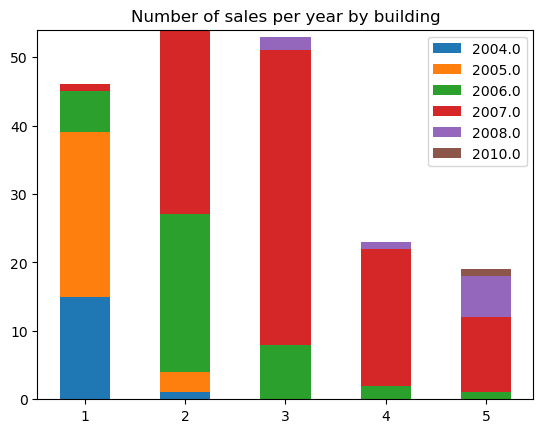

In [74]:
# Create the stacked bar chart.
sale_dict = {} # Store the sales in a dictionary. Each key is a year and its value is a list of sales per building type for that year. 
for year in years: # Iterate through the years 2004, 2005, 2006, 2007, 2008, and 2010. 
    value = [] # This will contain the sales per building type for a given year. 
    for building  in buildings: # Iterate through the building types.
        sale = 0 # We initially set the number of sales to be 0.
        # If the building has been sold in the year, then find its sale number and append it to the list. Otherwise the sale will remain as 0. 
        for i in sales_per_year_by_building.index:
            if i[0]==building and i[1]==year:
                sale = sales_per_year_by_building.loc[i]
                break
        value.append(sale)
    sale_dict[year] = value

width = 0.5 # Width of each bar.

fig, ax = plt.subplots()
bottom = np.zeros(len(buildings)) # Used for determining where to stack each iteration of the bars. Initially we stack all bars at the same level. 

# Plots the stacked bar chart.
for year, sale_list in sale_dict.items(): # Iteratre through the years and its corresponding list of sales. 
    p = ax.bar(buildings, sale_list, width, label=year, bottom=bottom) # Plot the bars for the current iteration.
    bottom += sale_list # To ensure we stack the next iteration of bars correctly. 

ax.set_title("Number of sales per year by building")
ax.legend(loc="upper right")

plt.show()

Ignoring the stacked compenents and looking at it as an ordinary bar chart, this supports our earlier conclusion that buildings 1, 2, and 3 had higher sales than buildings 4 and 5. By looking at the stacked bars for each building type, we get insight on the sale numbers over the years. For example, for all building type except 1, the sales increased leading up to the year 2007 then decreased abruptly. Given the time period, this is probably part of the wider context of the 2007-2008 financial crisis. 

### Stacked area chart - sales per year by building

In [75]:
data_stacked_area = data.copy()

In [76]:
# Encode values of building column as dummy variables. 
building_dummies = pd.get_dummies(data_stacked_area['building'])
building_dummies.head()

,1,2,3,4,5
0,True,False,False,False,False
1,True,False,False,False,False
2,False,True,False,False,False
3,False,True,False,False,False
4,True,False,False,False,False


In [77]:
# Join dummy variables to our original dataframe.
data_stacked_area = pd.concat([data_stacked_area, building_dummies], axis=1)
data_stacked_area.head()

,id,building,date_sale,type,property#,area,price,sold,customer_id,year_sale,...,purpose,deal_satisfaction,mortgage,source,full_name,1,2,3,4,5
0,1030,1,2005-11-01,apartment,30,743.09,246172.68,1,C0028,2005.0,...,home,5.0,0.0,website,Madalyn Mercer,True,False,False,False,False
1,1029,1,2005-10-01,apartment,29,756.21,246331.90,1,C0027,2005.0,...,home,5.0,0.0,website,Lara Carrillo,True,False,False,False,False
2,2002,2,2007-07-01,apartment,2,587.28,209280.91,1,C0112,2007.0,...,home,1.0,1.0,client,Donavan Flowers,False,True,False,False,False
3,2031,2,2007-12-01,apartment,31,1604.75,452667.01,1,C0160,2007.0,...,investment,3.0,1.0,website,Darien Dorsey,False,True,False,False,False
4,1049,1,2004-11-01,apartment,49,1375.45,467083.31,1,C0014,2004.0,...,home,4.0,0.0,agency,Alessandra Perry,True,False,False,False,False


In [78]:
# Give more descriptive names to the dummy columns.
data_stacked_area = data_stacked_area.rename(columns={'1':'building1',
                                                      '2':'building2',
                                                      '3':'building3',
                                                      '4':'building4',
                                                      '5':'building5'})
data_stacked_area.head()

,id,building,date_sale,type,property#,area,price,sold,customer_id,year_sale,...,purpose,deal_satisfaction,mortgage,source,full_name,building1,building2,building3,building4,building5
0,1030,1,2005-11-01,apartment,30,743.09,246172.68,1,C0028,2005.0,...,home,5.0,0.0,website,Madalyn Mercer,True,False,False,False,False
1,1029,1,2005-10-01,apartment,29,756.21,246331.90,1,C0027,2005.0,...,home,5.0,0.0,website,Lara Carrillo,True,False,False,False,False
2,2002,2,2007-07-01,apartment,2,587.28,209280.91,1,C0112,2007.0,...,home,1.0,1.0,client,Donavan Flowers,False,True,False,False,False
3,2031,2,2007-12-01,apartment,31,1604.75,452667.01,1,C0160,2007.0,...,investment,3.0,1.0,website,Darien Dorsey,False,True,False,False,False
4,1049,1,2004-11-01,apartment,49,1375.45,467083.31,1,C0014,2004.0,...,home,4.0,0.0,agency,Alessandra Perry,True,False,False,False,False


In [79]:
# Number of sales per year by building types.
columns_of_interest = ['year_sale','building1','building2','building3','building4','building5']
stacked_area = data_stacked_area[columns_of_interest].groupby('year_sale').sum()
stacked_area

,building1,building2,building3,building4,building5
year_sale,,,,,
2004.0,15,1,0,0,0
2005.0,24,3,0,0,0
2006.0,6,23,8,2,1
2007.0,1,27,43,20,11
2008.0,0,0,2,1,6
2010.0,0,0,0,0,1


In [80]:
# Fill in the missing year 2009 by adding zero sales. 
year_2009 = pd.DataFrame({'building1': [0], 
                          "building2": [0], 
                          "building3": [0],
                          "building4": [0],
                          "building5": [0]})

stacked_area = pd.concat([stacked_area, year_2009])
stacked_area.index = ['2004','2005','2006','2007','2008','2010','2009']
stacked_area = stacked_area.loc[['2004','2005','2006','2007','2008','2009','2010']]
stacked_area

,building1,building2,building3,building4,building5
2004,15,1,0,0,0
2005,24,3,0,0,0
2006,6,23,8,2,1
2007,1,27,43,20,11
2008,0,0,2,1,6
2009,0,0,0,0,0
2010,0,0,0,0,1


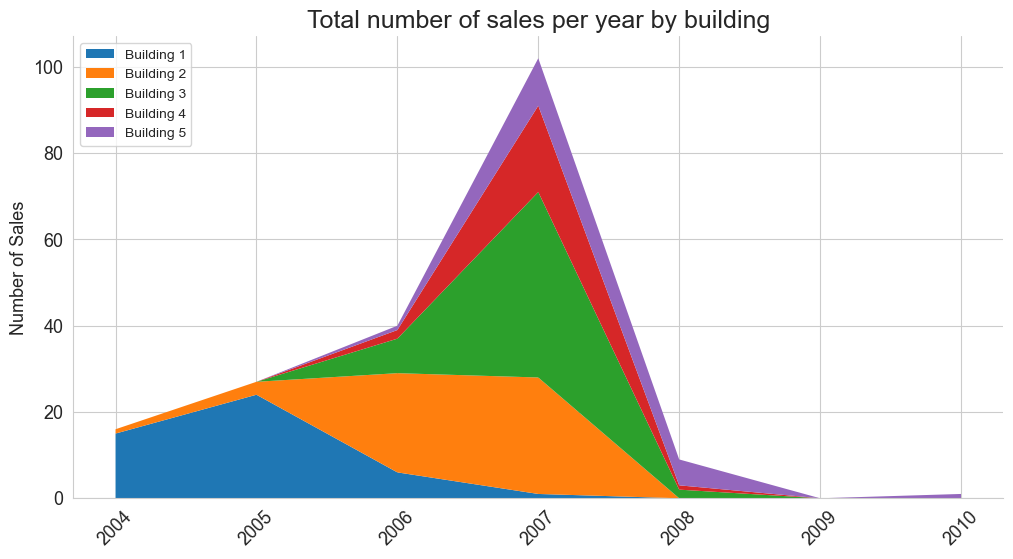

In [81]:
# Labels for the building types. 
labels = ['Building 1','Building 2','Building 3','Building 4','Building 5']

# Use a white background and gridlines for the plot.
sns.set_style("whitegrid")

plt.figure(figsize = (12, 6))

# Generate the stacked area plot.
plt.stackplot(stacked_area.index,
              stacked_area['building1'],
              stacked_area['building2'],
              stacked_area['building3'],
              stacked_area['building4'],
              stacked_area['building5'],
              edgecolor = 'none')

plt.xticks(stacked_area.index, rotation = 45, fontsize=13) 
plt.yticks(fontsize = 13)
plt.legend(labels = labels, loc = "upper left") 
plt.ylabel("Number of Sales", fontsize = 13)

plt.title("Total number of sales per year by building", fontsize = 18)

sns.despine() # Remove the top and right borders of the chart for a clean appearance.

This plot also tells us that sales increased up to the year 2007, then went down abruptly. 

## Customer profile

### Country analysis

Breakdown of totals by country.

In [82]:
columns_of_interest = ['country', 'sold','mortgage']
data[columns_of_interest].groupby("country").sum()

,sold,mortgage
country,,
Belgium,2,0.0
Canada,7,0.0
Denmark,1,0.0
Germany,1,0.0
Mexico,1,0.0
Russia,4,1.0
UK,2,0.0
USA,177,61.0


The majority of customers of the client company who bought a property were from the USA. 

Breakdown of averages by country.

In [83]:
columns_of_interest = ['country', 'area', 'deal_satisfaction','price']
data[columns_of_interest].groupby("country").mean()


,area,deal_satisfaction,price
country,,,
Belgium,852.730000,3.000000,229075.470000
Canada,917.382857,5.000000,274069.384286
Denmark,785.480000,1.000000,257183.480000
Germany,743.410000,5.000000,205098.210000
Mexico,1283.450000,3.000000,338181.180000
Russia,903.757500,2.500000,278828.835000
UK,739.480000,4.000000,220142.680000
USA,900.794463,3.581921,270096.266554


Bar chart of deal satisfaction by country.

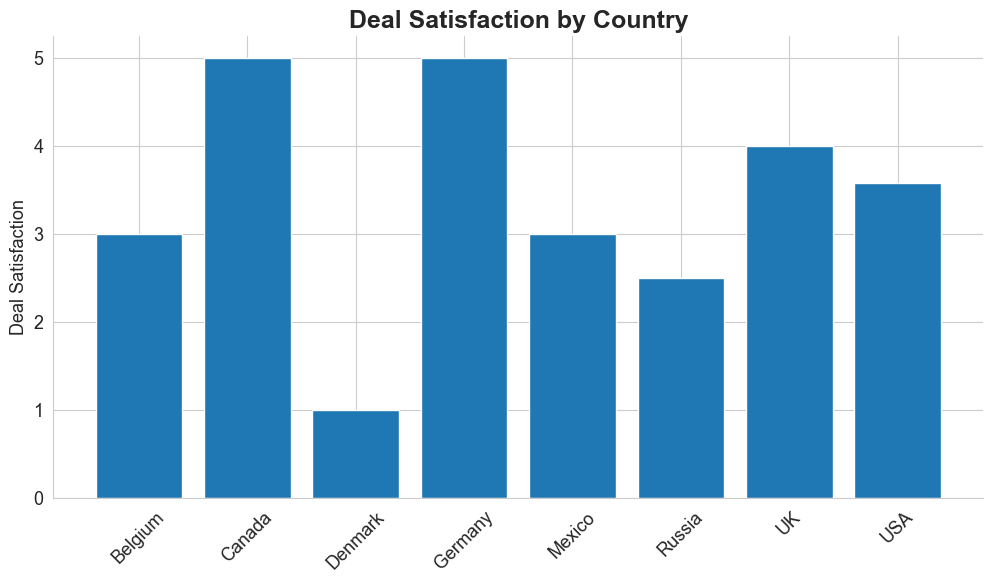

In [84]:
columns_of_interest = ['country', 'area', 'deal_satisfaction','price']
averages_by_country = data[columns_of_interest].groupby("country").mean()

sns.set_style("whitegrid")

plt.figure(figsize = (12, 6)) 

plt.bar(x = averages_by_country.index, 
        height = averages_by_country['deal_satisfaction'])
plt.xticks(rotation = 45, fontsize = 13) 
plt.yticks(fontsize = 13) 
plt.title("Deal Satisfaction by Country", fontsize = 18, fontweight = "bold") 
plt.ylabel("Deal Satisfaction", fontsize = 13 ) 

sns.despine()

The countries with the highest deal satisfaction are Canada and Germany. However, it should be noted that this is based on a small sample size from each country.

### State analysis

Breakdown of totals by state.

In [85]:
columns_of_interest = ['state', 'sold','mortgage']
data[columns_of_interest].groupby("state").sum()

,sold,mortgage
state,,
Arizona,9,3.0
California,118,41.0
Colorado,11,5.0
Kansas,1,0.0
Nevada,17,8.0
Oregon,11,1.0
Utah,5,1.0
Virginia,4,2.0
Wyoming,1,0.0


Breakdown of averages by state.

In [86]:
columns_of_interest = ['state', 'area', 'deal_satisfaction','price']
data[columns_of_interest].groupby("state").mean()

,area,deal_satisfaction,price
state,,,
Arizona,848.533333,3.222222,265079.216667
California,936.684492,3.737288,279852.950763
Colorado,777.010909,3.181818,233662.461818
Kansas,923.210000,3.000000,252185.990000
Nevada,921.692941,3.235294,277649.329412
Oregon,766.954545,3.090909,236593.322727
Utah,814.986000,3.200000,237755.280000
Virginia,730.712500,4.500000,215144.187500
Wyoming,701.660000,3.000000,204286.670000


Frequency distribution of state.

In [87]:
columns_of_interest = ['state', 'sold']
sold_by_state = data[columns_of_interest].groupby("state").sum()
sold_by_state

,sold
state,
Arizona,9
California,118
Colorado,11
Kansas,1
Nevada,17
Oregon,11
Utah,5
Virginia,4
Wyoming,1


In [88]:
sold_by_state = sold_by_state.sort_values('sold', ascending=False)
sold_by_state

,sold
state,
California,118
Nevada,17
Colorado,11
Oregon,11
Arizona,9
Utah,5
Virginia,4
Kansas,1
Wyoming,1


In [89]:
sold_by_state = sold_by_state.rename(columns={'sold':'frequency'})
sold_by_state

,frequency
state,
California,118
Nevada,17
Colorado,11
Oregon,11
Arizona,9
Utah,5
Virginia,4
Kansas,1
Wyoming,1


Relative frequency of each state.

In [90]:
sold_by_state['relative_frequency'] = sold_by_state['frequency']/sold_by_state['frequency'].sum()
sold_by_state

,frequency,relative_frequency
state,,
California,118,0.666667
Nevada,17,0.096045
Colorado,11,0.062147
Oregon,11,0.062147
Arizona,9,0.050847
Utah,5,0.028249
Virginia,4,0.022599
Kansas,1,0.005650
Wyoming,1,0.005650


Cumulative frequency of each state.

In [91]:
sold_by_state['cumulative_frequency'] = sold_by_state['relative_frequency'].cumsum()
sold_by_state

,frequency,relative_frequency,cumulative_frequency
state,,,
California,118,0.666667,0.666667
Nevada,17,0.096045,0.762712
Colorado,11,0.062147,0.824859
Oregon,11,0.062147,0.887006
Arizona,9,0.050847,0.937853
Utah,5,0.028249,0.966102
Virginia,4,0.022599,0.988701
Kansas,1,0.005650,0.994350
Wyoming,1,0.005650,1.000000


Pareto chart of frequency distribution of state.

Text(0.5, 1.0, 'Segmentation of US Clients by State')

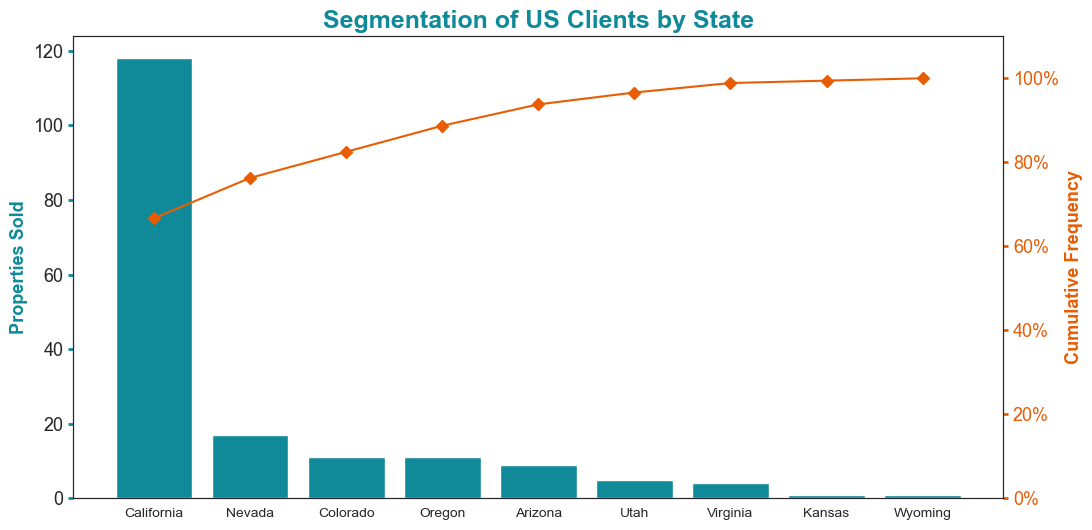

In [92]:
sns.set_style("white") 

# To create the Pareto diagram, we first initiate a figure with two axes.
fig, ax = plt.subplots(figsize = (12, 6))

# The first part of the plot is a bar chart. 
ax.bar(sold_by_state.index,
       sold_by_state["frequency"],
       color = "#108A99")
ax.set_ylabel("Properties Sold", 
              weight='bold',
              fontsize = 13,
              color = "#108A99")
ax.tick_params(axis = "y", 
               width = 2, 
               labelsize = 13,
               color = "#108A99")

# Creating a second axis that shares the same x-axis as the first.
ax2 = ax.twinx()

# Setting the y-axis limit and formatting it to show percentages.
ax2.set_ylim(0, 1.1)
ax2.yaxis.set_major_formatter(PercentFormatter(xmax = 1.0))

# The second part of the plot is a line chart.
ax2.plot(sold_by_state.index,
         sold_by_state["cumulative_frequency"], 
         color = "#E85D04", 
         marker = "D")
ax2.set_ylabel("Cumulative Frequency", 
               color = "#E85D04", 
               weight = "bold",
               fontsize=13)
ax2.tick_params(axis = "y", 
                colors = "#E85D04", 
                width = 2, 
                labelsize = 13)
ax.set_title("Segmentation of US Clients by State", fontsize = 18, weight = "bold", color = "#108A99")

California and Nevada make up around 80% of all of the properties sold. 

### Age analysis

Add age at purchase column.

In [93]:
# Define a function that calculates the age of a customer at the time they purchased a property.
def age(x):
    if x['date_sale'].month > x['birth_date'].month or (x['date_sale'].month == x['birth_date'].month and x['date_sale'].day >= x['birth_date'].day):
        return x['date_sale'].year - x['birth_date'].year
    else:
        return x['date_sale'].year - x['birth_date'].year - 1

data['age_at_purchase'] = data.apply(lambda x: age(x) if pd.notnull(x['date_sale']) and pd.notnull(x['birth_date']) else np.nan, axis=1)

Add age interval column.

In [94]:
data['age_interval'] = pd.cut(data['age_at_purchase'], bins = 10, precision = 0)
data['age_interval']

0      (19.0, 25.0]
1      (19.0, 25.0]
2      (19.0, 25.0]
3      (19.0, 25.0]
4      (25.0, 30.0]
           ...     
262             NaN
263             NaN
264             NaN
265             NaN
266             NaN
Name: age_interval, Length: 267, dtype: category
Categories (10, interval[float64, right]): [(19.0, 25.0] < (25.0, 30.0] < (30.0, 36.0] < (36.0, 42.0] ... (53.0, 59.0] < (59.0, 65.0] < (65.0, 70.0] < (70.0, 76.0]]

Breakdown of totals by age intervals.

In [95]:
columns_of_interest = ['age_interval', 'sold', "mortgage"]
data[columns_of_interest].groupby("age_interval").sum()

/var/folders/kr/gc11xfcj2bn2vflgczw_jb_80000gn/T/ipykernel_92338/2922252817.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data[columns_of_interest].groupby("age_interval").sum()


,sold,mortgage
age_interval,,
"(19.0, 25.0]",4,2.0
"(25.0, 30.0]",16,5.0
"(30.0, 36.0]",29,8.0
"(36.0, 42.0]",30,13.0
"(42.0, 48.0]",24,7.0
"(48.0, 53.0]",23,11.0
"(53.0, 59.0]",18,4.0
"(59.0, 65.0]",12,3.0
"(65.0, 70.0]",18,3.0


Breakdown of averages by age intervals.

In [96]:
columns_of_interest = ['age_interval', 'area', 'deal_satisfaction','price']
data[columns_of_interest].groupby("age_interval").mean()

/var/folders/kr/gc11xfcj2bn2vflgczw_jb_80000gn/T/ipykernel_92338/2393010742.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data[columns_of_interest].groupby("age_interval").mean()


,area,deal_satisfaction,price
age_interval,,,
"(19.0, 25.0]",922.832500,3.500000,288613.125000
"(25.0, 30.0]",1020.606875,3.687500,312819.619375
"(30.0, 36.0]",910.098966,3.206897,268568.399655
"(36.0, 42.0]",955.682333,3.300000,285465.888333
"(42.0, 48.0]",938.985417,3.416667,279075.726667
"(48.0, 53.0]",843.382174,3.695652,246479.473043
"(53.0, 59.0]",846.428889,3.555556,259550.793333
"(59.0, 65.0]",890.801667,4.583333,264594.702500
"(65.0, 70.0]",820.905000,3.388889,246305.460556


On average, customers in their late 20s purchased more expensive properties compared to all other age groups. On the contrary, older customers aged between 59-65 were the most satisfied with their purchase. 

Histrogram of age distribution.

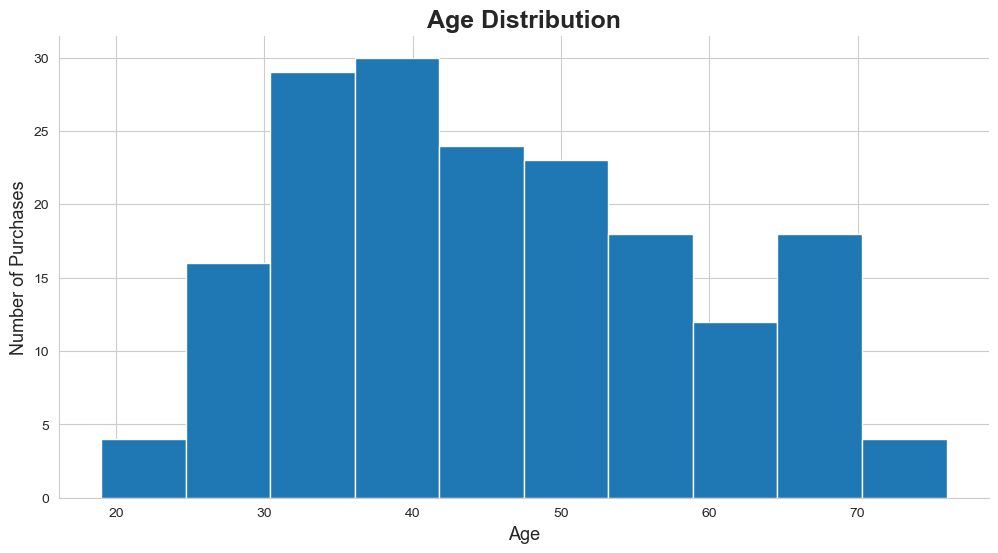

In [97]:
sns.set_style("whitegrid") 

plt.figure(figsize = (12, 6)) 

plt.hist(data['age_at_purchase'], 
         bins = 10)
plt.title("Age Distribution", fontsize = 18, weight = "bold")
plt.xlabel("Age", fontsize=13)
plt.ylabel("Number of Purchases", fontsize=13)

sns.despine()

The distribution of age seems to be right skewed with most of the purchases coming from customers aged between 30-50.

### Analysis of price

Add price interval column.

In [98]:
data['price_interval'] = pd.cut(data['price'], bins=10)
data['price_interval']

0      (243776.371, 285847.138]
1      (243776.371, 285847.138]
2      (201705.604, 243776.371]
3      (412059.439, 454130.206]
4      (454130.206, 496200.973]
                 ...           
262    (285847.138, 327917.905]
263    (243776.371, 285847.138]
264    (285847.138, 327917.905]
265    (327917.905, 369988.672]
266    (159634.837, 201705.604]
Name: price_interval, Length: 267, dtype: category
Categories (10, interval[float64, right]): [(117143.362, 159634.837] < (159634.837, 201705.604] < (201705.604, 243776.371] < (243776.371, 285847.138] ... (369988.672, 412059.439] < (412059.439, 454130.206] < (454130.206, 496200.973] < (496200.973, 538271.74]]

Count of properties by price interval.

In [99]:
columns_of_interest = ['price_interval', 'sold']
all_properties_by_price = data[columns_of_interest].groupby("price_interval").count()
all_properties_by_price = all_properties_by_price.rename(columns={'sold':'count'})
all_properties_by_price

/var/folders/kr/gc11xfcj2bn2vflgczw_jb_80000gn/T/ipykernel_92338/2637977976.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  all_properties_by_price = data[columns_of_interest].groupby("price_interval").count()


,count
price_interval,
"(117143.362, 159634.837]",3
"(159634.837, 201705.604]",32
"(201705.604, 243776.371]",88
"(243776.371, 285847.138]",47
"(285847.138, 327917.905]",31
"(327917.905, 369988.672]",18
"(369988.672, 412059.439]",21
"(412059.439, 454130.206]",7
"(454130.206, 496200.973]",11


In [100]:
all_properties_by_price["sold"] = data[columns_of_interest].groupby("price_interval").sum()
all_properties_by_price

/var/folders/kr/gc11xfcj2bn2vflgczw_jb_80000gn/T/ipykernel_92338/1610533929.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  all_properties_by_price["sold"] = data[columns_of_interest].groupby("price_interval").sum()


,count,sold
price_interval,,
"(117143.362, 159634.837]",3,2
"(159634.837, 201705.604]",32,28
"(201705.604, 243776.371]",88,68
"(243776.371, 285847.138]",47,34
"(285847.138, 327917.905]",31,24
"(327917.905, 369988.672]",18,12
"(369988.672, 412059.439]",21,13
"(412059.439, 454130.206]",7,4
"(454130.206, 496200.973]",11,7


In [101]:
all_properties_by_price['not_sold'] = all_properties_by_price['count'] - all_properties_by_price['sold']
all_properties_by_price

,count,sold,not_sold
price_interval,,,
"(117143.362, 159634.837]",3,2,1
"(159634.837, 201705.604]",32,28,4
"(201705.604, 243776.371]",88,68,20
"(243776.371, 285847.138]",47,34,13
"(285847.138, 327917.905]",31,24,7
"(327917.905, 369988.672]",18,12,6
"(369988.672, 412059.439]",21,13,8
"(412059.439, 454130.206]",7,4,3
"(454130.206, 496200.973]",11,7,4


The majority of the properties are priced from $160,000 to $320,000. 

### Correlation between age and price

In [102]:
# The corrlation method provided by pandas handles missing values automatically. 
data[['age_at_purchase','price']].corr()

,age_at_purchase,price
age_at_purchase,1.000000,-0.175911
price,-0.175911,1.000000


There is a negative correlation between a customer's age and the price of purchased properties. This suggests that older customers spend less, which is supported by the eariler observation that younger customers in their late 20s had the higest spending on properties. However, the small magnitude of the correlation suggests that the relationship is not as straightfoward as a linear one. 

## Revenue generated by year

Breakdown of revenue genearated for the client company by year.

In [103]:
columns_of_interest = ['year_sale','price']
revenue_per_year = data[columns_of_interest].groupby('year_sale').sum()

revenue_per_year = revenue_per_year.rename(columns={'price':'revenue'})
revenue_per_year

,revenue
year_sale,
2004.0,4397009.80
2005.0,7215232.41
2006.0,10906000.58
2007.0,27451798.34
2008.0,2212160.05
2010.0,357538.20


Revenue expressed in millions.

In [104]:
revenue_per_year['revenue'] = revenue_per_year['revenue']/1000000
revenue_per_year.rename(columns={"revenue": "revenue_in_M"}, inplace=True)
revenue_per_year


,revenue_in_M
year_sale,
2004.0,4.397010
2005.0,7.215232
2006.0,10.906001
2007.0,27.451798
2008.0,2.212160
2010.0,0.357538


Add missing year 2009 by including a zero revenue.

In [105]:
revenue_per_year = pd.concat([revenue_per_year, pd.DataFrame({'revenue_in_M': [0]})])
revenue_per_year.index = ['2004','2005','2006','2007','2008','2010','2009']
revenue_per_year = revenue_per_year.loc[['2004','2005','2006','2007','2008','2009','2010']]
revenue_per_year

,revenue_in_M
2004,4.397010
2005,7.215232
2006,10.906001
2007,27.451798
2008,2.212160
2009,0.000000
2010,0.357538


Plot the revenue by year.

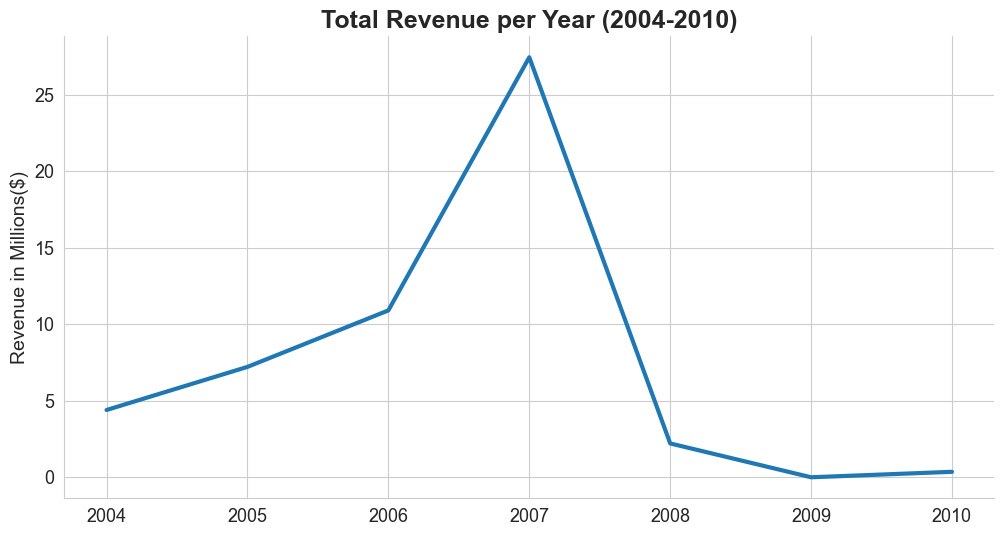

In [106]:
sns.set_style("whitegrid")

plt.figure(figsize = (12, 6)) 

plt.plot(revenue_per_year['revenue_in_M'], linewidth=3)

plt.title("Total Revenue per Year (2004-2010)", fontsize = 18, fontweight = "bold")
plt.ylabel("Revenue in Millions($)", fontsize = 14)
plt.xticks(fontsize = 13) 
plt.yticks(fontsize = 13)

sns.despine() 

The revenue increased, peaking at the year 2007. After which it rapidly declined and remained stagnant. This is in line with our observations from the property analysis section. 

# Export data

In [110]:
# # Uncomment code to export the cleaned data.
# data.to_csv("data_cleaned.csv", index=False)